<a href="https://colab.research.google.com/github/Shayan007/Statistics-Project/blob/main/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
from pandas_datareader import data as wb

# **Importing Dataset**

In [2]:
start_date = '2018-04-01'
end_date = '2023-03-31'

tickers = ['RELIANCE.NS', 'TCS.NS', 'HINDUNILVR.NS']

dfs = {}

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    dfs[ticker] = data

reliance_df = dfs['RELIANCE.NS']
tcs_df = dfs['TCS.NS']
hindunilvr_df = dfs['HINDUNILVR.NS']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# **Individual Stock Analysis**

### **Reliance Industries Ltd**

In [3]:
reliance_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,884.614746,892.490112,878.175781,884.565186,865.632202,5766209
2018-04-03,882.633545,893.233032,876.937500,891.103210,872.030212,6425059
2018-04-04,896.204895,903.238220,883.673645,886.496887,867.522461,6560005
2018-04-05,896.601135,901.455078,895.016113,899.671997,880.415649,3935631
2018-04-06,899.473877,909.875305,896.502075,902.445740,883.130066,4460344
...,...,...,...,...,...,...
2023-03-23,2268.000000,2269.899902,2243.050049,2247.800049,2247.800049,7499082
2023-03-24,2245.250000,2250.000000,2198.000000,2203.300049,2203.300049,5711497
2023-03-27,2217.500000,2254.000000,2200.199951,2237.550049,2237.550049,6486068


In [4]:
reliance_df.shape

(1237, 6)

In [5]:
reliance_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2018-04-02 to 2023-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1237 non-null   float64
 1   High       1237 non-null   float64
 2   Low        1237 non-null   float64
 3   Close      1237 non-null   float64
 4   Adj Close  1237 non-null   float64
 5   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.6 KB


In [6]:
reliance_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03
mean,1837.901704,1858.670020,1815.558474,1836.259551,1824.613708,9.946659e+06
std,573.604487,578.263684,568.278772,572.874920,577.901713,7.391570e+06
min,882.633545,892.490112,867.427673,875.748779,865.632202,7.871600e+05
25%,1269.020996,1279.670044,1254.607544,1266.494873,1248.980957,5.624995e+06
50%,1965.900024,1983.800049,1939.050049,1960.599976,1948.446899,7.783173e+06
75%,2382.000000,2408.000000,2360.100098,2381.050049,2377.350098,1.137257e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.584835e+07


In [7]:
reliance_df.duplicated().sum()

0

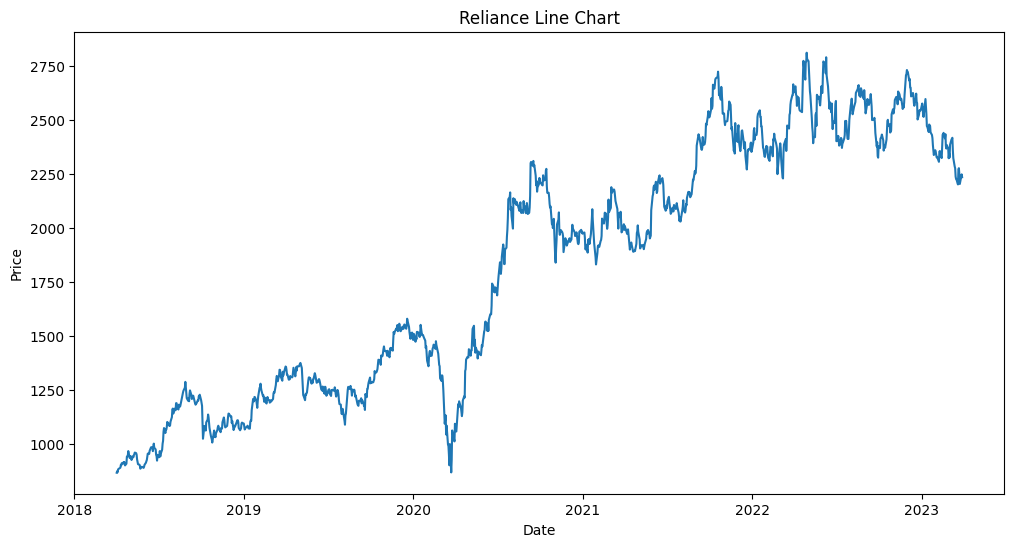

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(reliance_df.index, reliance_df['Adj Close'])
plt.title('Reliance Line Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

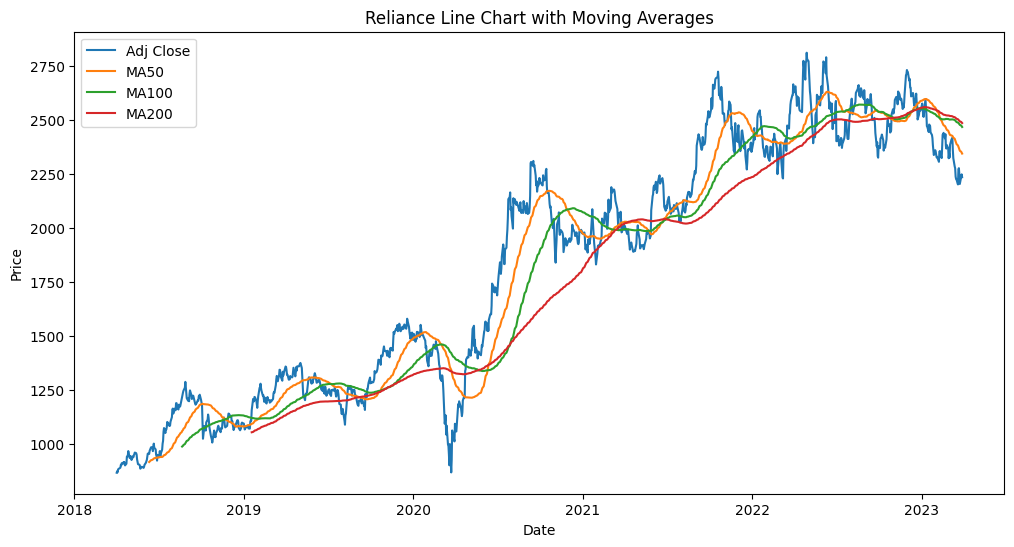

In [9]:
reliance_df['MA50'] = reliance_df['Adj Close'].rolling(window=50).mean()
reliance_df['MA100'] = reliance_df['Adj Close'].rolling(window=100).mean()
reliance_df['MA200'] = reliance_df['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(reliance_df.index, reliance_df['Adj Close'], label='Adj Close')
plt.plot(reliance_df.index, reliance_df['MA50'], label='MA50')
plt.plot(reliance_df.index, reliance_df['MA100'], label='MA100')
plt.plot(reliance_df.index, reliance_df['MA200'], label='MA200')

plt.title('Reliance Line Chart with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

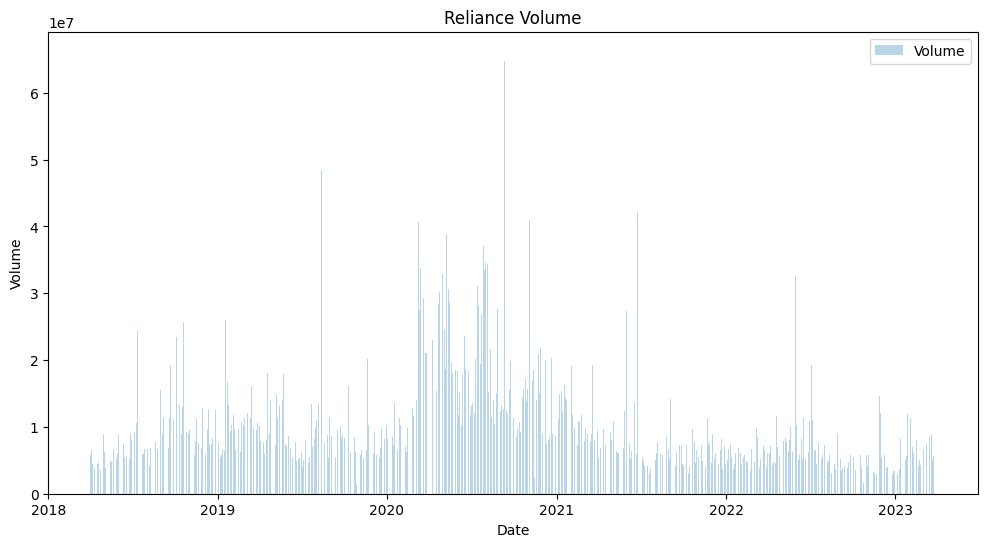

In [10]:
plt.figure(figsize=(12, 6))

plt.bar(reliance_df.index, reliance_df['Volume'], alpha=0.3, label='Volume')

plt.title('Reliance Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [11]:
reliance_df['daily_return'] = (reliance_df['Adj Close'] / reliance_df['Adj Close'].shift(1)) - 1
print (reliance_df['daily_return'])

Date
2018-04-02         NaN
2018-04-03    0.007391
2018-04-04   -0.005169
2018-04-05    0.014862
2018-04-06    0.003083
                ...   
2023-03-23   -0.012650
2023-03-24   -0.019797
2023-03-27    0.015545
2023-03-28    0.004670
2023-03-29   -0.005916
Name: daily_return, Length: 1237, dtype: float64


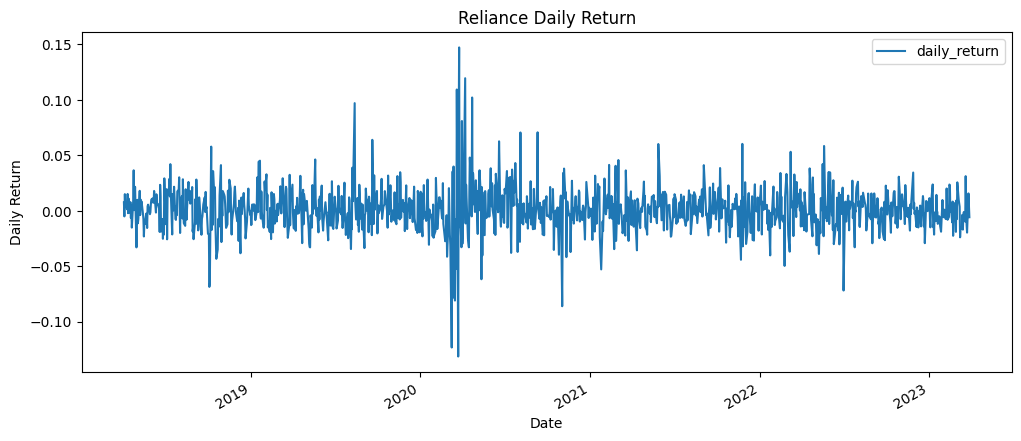

In [12]:
# Daily Return of Reliance

reliance_df['daily_return'].plot(figsize=(12, 5))
plt.title('Reliance Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

In [13]:
# Calculating CAGR of Reliance

total_trading_days = len(reliance_df)

initial_price =reliance_df['Adj Close'].iloc[0]
final_price = reliance_df['Adj Close'].iloc[-1]
cagr = (final_price / initial_price) ** (1 / (total_trading_days / 250)) - 1

print('CAGR:', '{:.2%}'.format(cagr))

CAGR: 21.13%


In [14]:
# Calculating Standard Deviation for Reliance

reliance_df['Daily_Return'] = reliance_df['Adj Close'].pct_change()

std_dev_annual = (np.std(reliance_df['Daily_Return']) * np.sqrt(250))

print('Standard Deviation:', '{:.2%}'.format(std_dev_annual))

Standard Deviation: 31.50%


### **Tata Consultancy Services Ltd**

In [15]:
tcs_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,1420.000000,1457.000000,1420.000000,1454.824951,1295.890137,1662988
2018-04-03,1446.050049,1464.949951,1446.050049,1455.625000,1296.602783,1937290
2018-04-04,1464.724976,1467.000000,1446.000000,1455.449951,1296.446777,2841820
2018-04-05,1463.275024,1481.875000,1460.175049,1478.974976,1317.401733,1809424
2018-04-06,1477.000000,1480.000000,1463.275024,1475.150024,1313.994629,1129018
...,...,...,...,...,...,...
2023-03-23,3114.899902,3146.350098,3101.000000,3124.649902,3101.583008,1372218
2023-03-24,3148.899902,3170.000000,3106.000000,3120.500000,3097.463867,1329577
2023-03-27,3135.000000,3152.750000,3106.000000,3122.300049,3099.250488,1524217


In [16]:
tcs_df.shape

(1237, 6)

In [17]:
tcs_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2018-04-02 to 2023-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1237 non-null   float64
 1   High       1237 non-null   float64
 2   Low        1237 non-null   float64
 3   Close      1237 non-null   float64
 4   Adj Close  1237 non-null   float64
 5   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.6 KB


In [18]:
tcs_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03
mean,2676.054525,2702.627987,2646.855140,2674.439833,2529.041758,2.997540e+06
std,684.125098,687.021367,679.753745,683.429403,704.915913,1.907148e+06
min,1420.000000,1457.000000,1420.000000,1454.824951,1295.890137,1.445300e+05
25%,2060.000000,2081.000000,2035.050049,2052.899902,1881.240967,1.849619e+06
50%,2604.000000,2655.000000,2600.050049,2604.600098,2472.544189,2.540719e+06
75%,3292.850098,3325.000000,3262.100098,3290.500000,3174.071777,3.509339e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3857.103760,2.290380e+07


In [19]:
tcs_df.duplicated().sum()

0

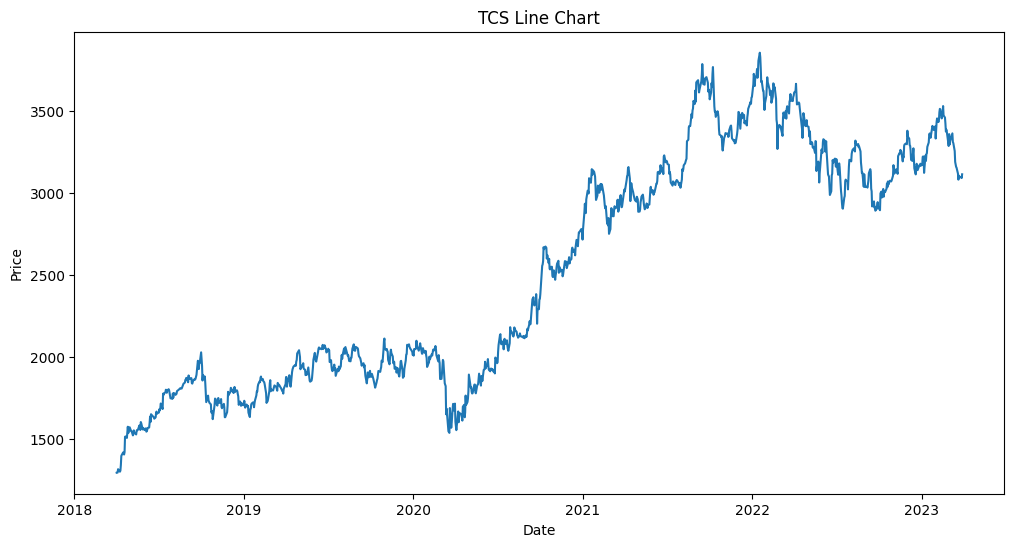

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(tcs_df.index, tcs_df['Adj Close'])
plt.title('TCS Line Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

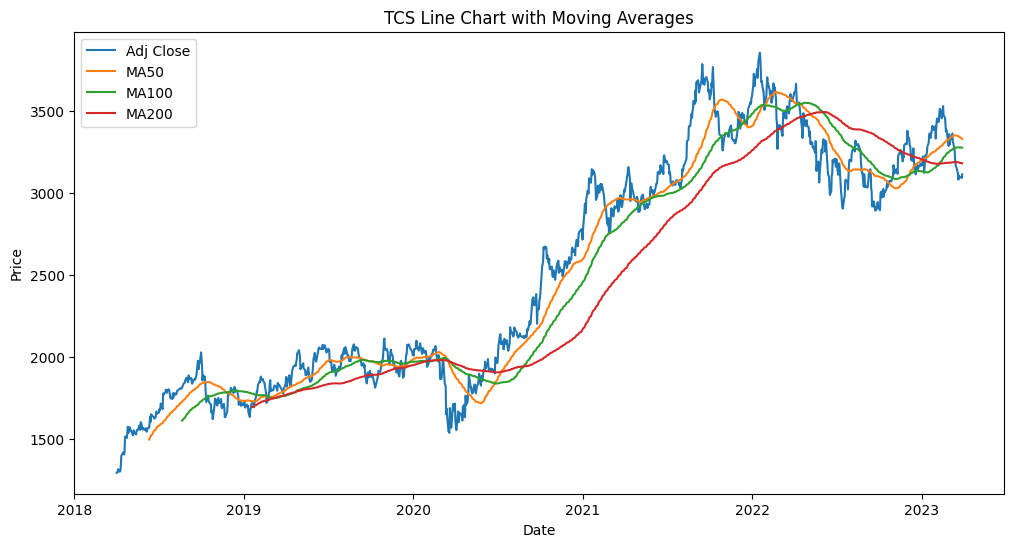

In [21]:
tcs_df['MA50'] = tcs_df['Adj Close'].rolling(window=50).mean()
tcs_df['MA100'] = tcs_df['Adj Close'].rolling(window=100).mean()
tcs_df['MA200'] = tcs_df['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(tcs_df.index, tcs_df['Adj Close'], label='Adj Close')
plt.plot(tcs_df.index, tcs_df['MA50'], label='MA50')
plt.plot(tcs_df.index, tcs_df['MA100'], label='MA100')
plt.plot(tcs_df.index, tcs_df['MA200'], label='MA200')

plt.title('TCS Line Chart with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

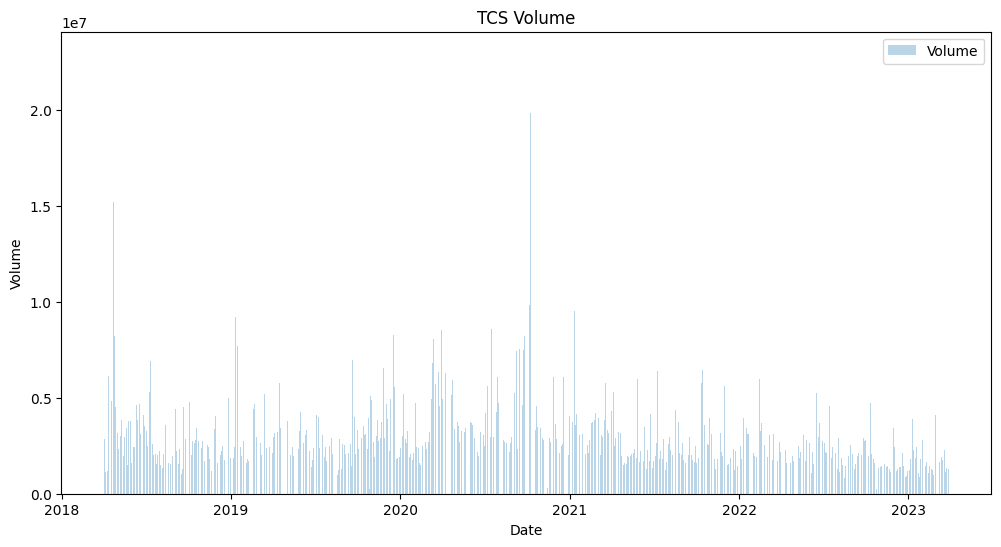

In [22]:
plt.figure(figsize=(12, 6))

plt.bar(tcs_df.index, tcs_df['Volume'], alpha=0.3, label='Volume')

plt.title('TCS Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [23]:
tcs_df['daily_return'] = (tcs_df['Adj Close'] / tcs_df['Adj Close'].shift(1)) - 1
print (tcs_df['daily_return'])

Date
2018-04-02         NaN
2018-04-03    0.000550
2018-04-04   -0.000120
2018-04-05    0.016163
2018-04-06   -0.002586
                ...   
2023-03-23   -0.001964
2023-03-24   -0.001328
2023-03-27    0.000577
2023-03-28   -0.002050
2023-03-29    0.007381
Name: daily_return, Length: 1237, dtype: float64


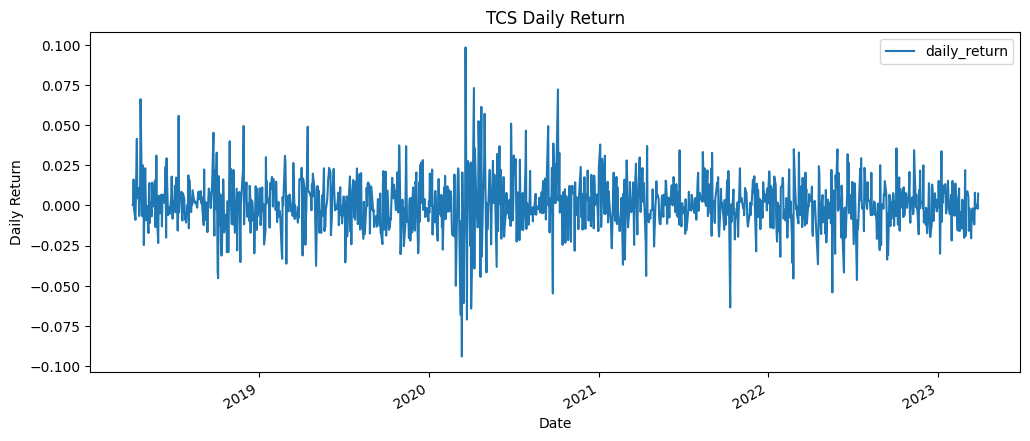

In [24]:
# Daily Return of TCS

tcs_df['daily_return'].plot(figsize=(12, 5))
plt.title('TCS Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

In [25]:
# Calculating CAGR of TCS

total_trading_days = len(tcs_df)

initial_price = tcs_df['Adj Close'].iloc[0]
final_price = tcs_df['Adj Close'].iloc[-1]
cagr = (final_price / initial_price) ** (1 / (total_trading_days / 250)) - 1

print('CAGR:', '{:.2%}'.format(cagr))

CAGR: 19.40%


In [26]:
# Calculating Standard Deviation for TCS

tcs_df['Daily_Return'] = tcs_df['Adj Close'].pct_change()

std_dev_annual = (np.std(tcs_df['Daily_Return']) * np.sqrt(250))

print('Standard Deviation:', '{:.2%}'.format(std_dev_annual))

Standard Deviation: 25.62%


### **Hindustan Unilever Ltd**

In [27]:
hindunilvr_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-02,1315.000000,1360.550049,1315.000000,1351.300049,1236.289062,708747
2018-04-03,1347.099976,1355.500000,1338.650024,1348.400024,1233.635986,979726
2018-04-04,1348.000000,1360.000000,1339.550049,1357.449951,1241.915283,912607
2018-04-05,1380.000000,1383.800049,1362.699951,1382.199951,1264.558838,588716
2018-04-06,1381.949951,1381.949951,1362.449951,1374.800049,1257.788940,633937
...,...,...,...,...,...,...
2023-03-23,2475.000000,2500.050049,2466.000000,2485.100098,2464.967773,1578627
2023-03-24,2472.199951,2497.899902,2470.000000,2480.800049,2460.702637,1449326
2023-03-27,2485.000000,2505.000000,2464.000000,2499.000000,2478.755127,1387736


In [28]:
hindunilvr_df.shape

(1237, 6)

In [29]:
hindunilvr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2018-04-02 to 2023-03-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1237 non-null   float64
 1   High       1237 non-null   float64
 2   Low        1237 non-null   float64
 3   Close      1237 non-null   float64
 4   Adj Close  1237 non-null   float64
 5   Volume     1237 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.6 KB


In [30]:
hindunilvr_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1.237000e+03
mean,2137.059337,2158.374692,2113.205137,2135.441190,2037.235193,2.020498e+06
std,341.548603,344.117701,337.812591,340.207458,365.860090,5.439864e+06
min,1315.000000,1355.500000,1315.000000,1348.400024,1233.635986,8.518700e+04
25%,1810.000000,1832.750000,1795.750000,1811.699951,1684.732666,1.117498e+06
50%,2170.000000,2189.000000,2143.149902,2167.600098,2062.913330,1.555483e+06
75%,2400.000000,2417.199951,2372.199951,2397.449951,2300.112549,2.158809e+06
max,2827.899902,2859.300049,2796.649902,2812.449951,2705.879639,1.856699e+08


In [31]:
hindunilvr_df.duplicated().sum()

0

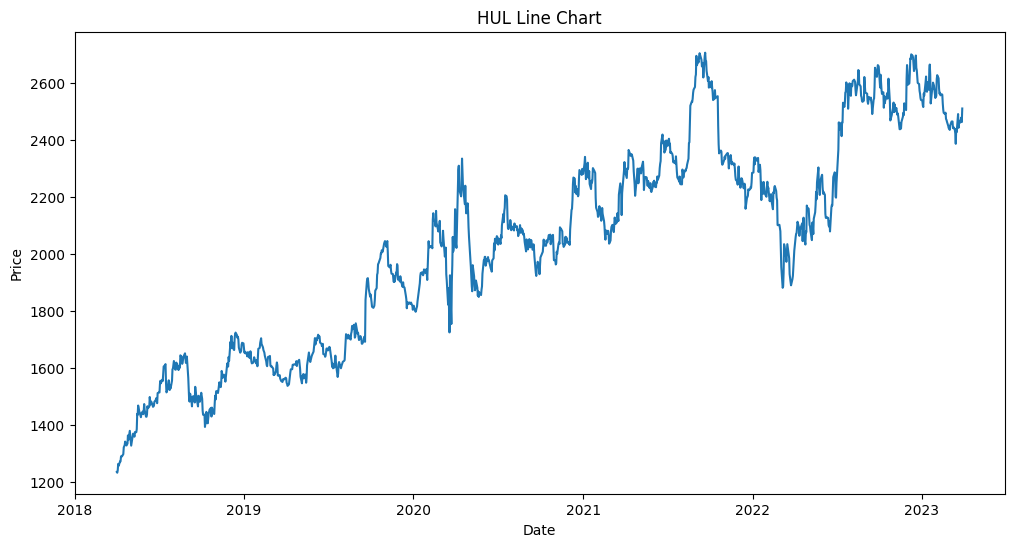

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(hindunilvr_df.index, hindunilvr_df['Adj Close'])
plt.title('HUL Line Chart')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

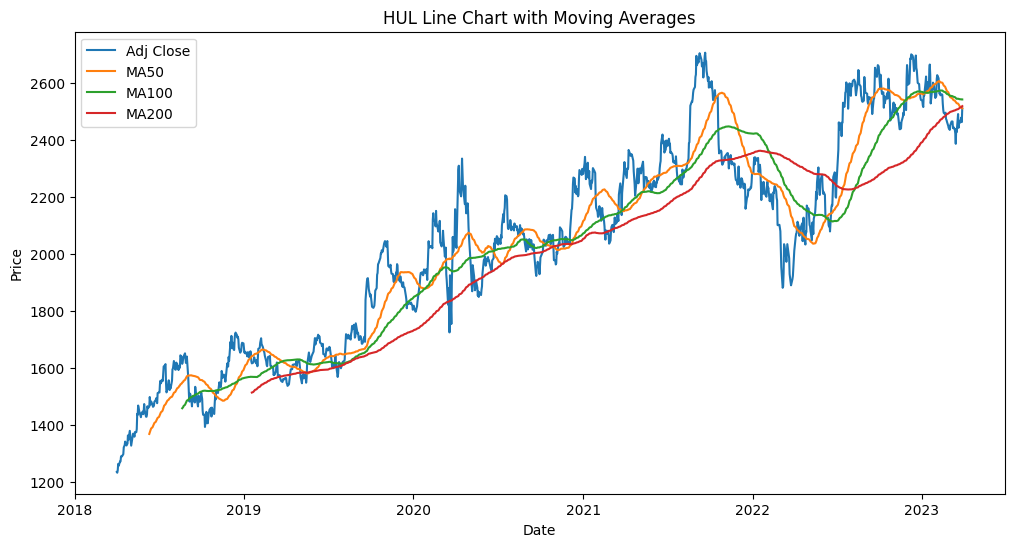

In [33]:
hindunilvr_df['MA50'] = hindunilvr_df['Adj Close'].rolling(window=50).mean()
hindunilvr_df['MA100'] = hindunilvr_df['Adj Close'].rolling(window=100).mean()
hindunilvr_df['MA200'] = hindunilvr_df['Adj Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(hindunilvr_df.index, hindunilvr_df['Adj Close'], label='Adj Close')
plt.plot(hindunilvr_df.index, hindunilvr_df['MA50'], label='MA50')
plt.plot(hindunilvr_df.index, hindunilvr_df['MA100'], label='MA100')
plt.plot(hindunilvr_df.index, hindunilvr_df['MA200'], label='MA200')

plt.title('HUL Line Chart with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

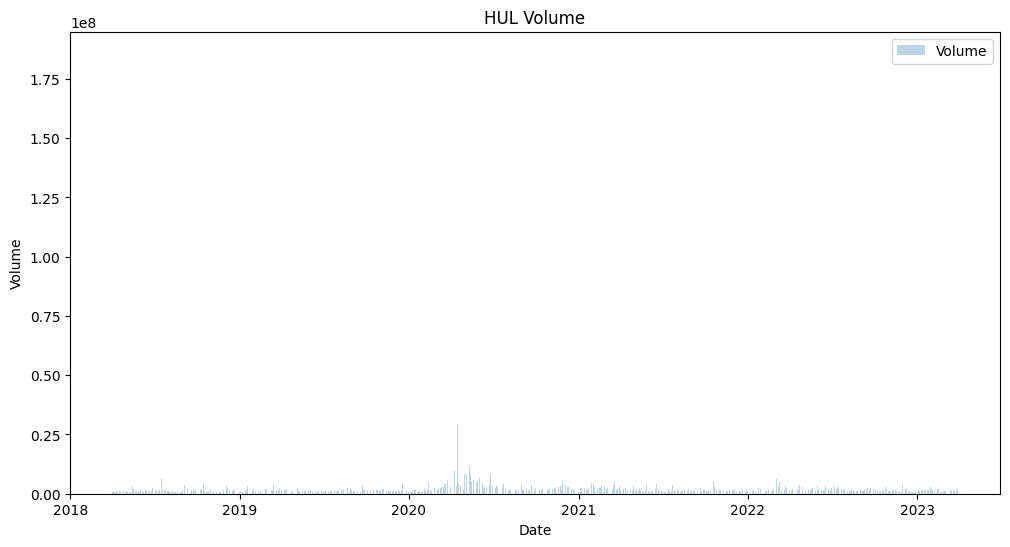

In [34]:
plt.figure(figsize=(12, 6))

plt.bar(hindunilvr_df.index, hindunilvr_df['Volume'], alpha=0.3, label='Volume')

plt.title('HUL Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [35]:
hindunilvr_df['daily_return'] = (hindunilvr_df['Adj Close'] / hindunilvr_df['Adj Close'].shift(1)) - 1
print (hindunilvr_df['daily_return'])

Date
2018-04-02         NaN
2018-04-03   -0.002146
2018-04-04    0.006711
2018-04-05    0.018233
2018-04-06   -0.005354
                ...   
2023-03-23    0.003533
2023-03-24   -0.001730
2023-03-27    0.007336
2023-03-28   -0.006483
2023-03-29    0.019353
Name: daily_return, Length: 1237, dtype: float64


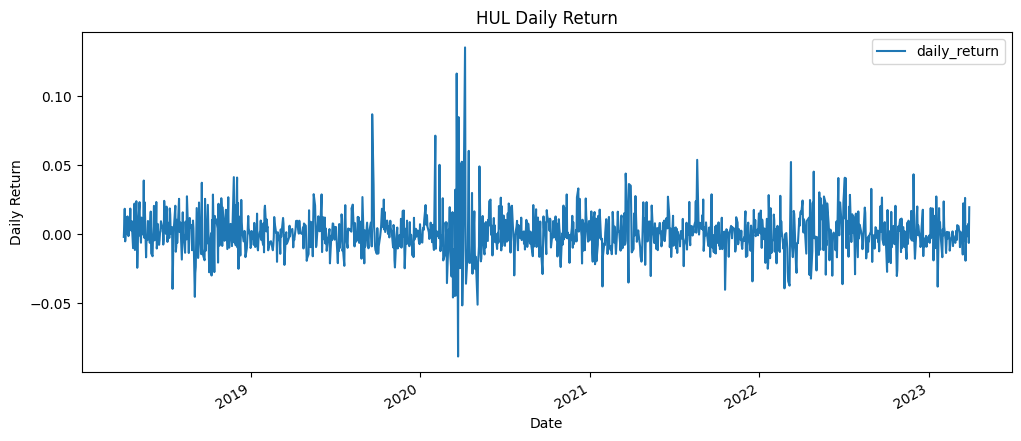

In [36]:
# Daily Return of TCS

hindunilvr_df['daily_return'].plot(figsize=(12, 5))
plt.title('HUL Daily Return')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

In [37]:
# Calculating CAGR of HUL

total_trading_days = len(hindunilvr_df)

initial_price = hindunilvr_df['Adj Close'].iloc[0]
final_price = hindunilvr_df['Adj Close'].iloc[-1]
cagr = (final_price / initial_price) ** (1 / (total_trading_days / 250)) - 1

print('CAGR:', '{:.2%}'.format(cagr))

CAGR: 15.39%


In [38]:
# Calculating Standard Deviation for HUL

hindunilvr_df['Daily_Return'] = hindunilvr_df['Adj Close'].pct_change()

std_dev_annual = (np.std(hindunilvr_df['Daily_Return']) * np.sqrt(250))

print('Standard Deviation:', '{:.2%}'.format(std_dev_annual))

Standard Deviation: 24.56%


# **Evaluation of Stocks Performance - Sharpe Ratio**

In [39]:
cagr_data = {'Stock': ['Reliance', 'TCS', 'HUL'],
             'CAGR': [0.2113, 0.1940, 0.1539]}

std_data = {'Stock': ['Reliance', 'TCS', 'HUL'],
            'Std-D': [0.3150, 0.2562, 0.2456]}

cagr_df = pd.DataFrame(cagr_data)
std_df = pd.DataFrame(std_data)

cagr_df['CAGR'] = (cagr_df['CAGR'] * 100).map('{:.2f}%'.format)
std_df['Std-D'] = (std_df['Std-D'] * 100).map('{:.2f}%'.format)

combined_df = pd.merge(cagr_df, std_df, on='Stock')

print(combined_df)

      Stock    CAGR   Std-D
0  Reliance  21.13%  31.50%
1       TCS  19.40%  25.62%
2       HUL  15.39%  24.56%


In [40]:
combined_data = {'Stock': ['Reliance', 'TCS', 'HUL'],
                 'CAGR': [0.2113, 0.1940, 0.1539],
                 'Std-D': [0.3150, 0.2562, 0.2456]}

# Taking Risk Free Return as 7%
risk_free_return = 0.07

combined_df = pd.DataFrame(combined_data)

combined_df['Sharpe Ratio'] = (combined_df['CAGR'] - risk_free_return) / combined_df['Std-D']

combined_df = combined_df.drop(['CAGR', 'Std-D'], axis=1)

combined_df['Sharpe Ratio'] = combined_df['Sharpe Ratio'].map('{:.2f}'.format)

print(combined_df)

      Stock Sharpe Ratio
0  Reliance         0.45
1       TCS         0.48
2       HUL         0.34


Reliance has a Sharpe Ratio of 0.45, indicating that the stock's risk-adjusted return is positive. A higher Sharpe Ratio suggests a better risk-adjusted performance compared to other stocks in the dataset.

TCS has a Sharpe Ratio of 0.48, which is slightly higher than the Sharpe Ratio of Reliance. This suggests that TCS may have a slightly better risk-adjusted performance compared to Reliance.

HUL has a Sharpe Ratio of 0.34, which is lower than both Reliance and TCS. This indicates that HUL's risk-adjusted performance may be relatively weaker compared to the other two stocks.

# **Portfolio Analysis**

In [41]:
tickers = ['RELIANCE.NS', 'TCS.NS', 'HINDUNILVR.NS']

start_date = '2018-04-01'
end_date = '2023-03-31'

stock_data = yf.download(tickers, start=start_date, end=end_date)

portfolio_df = stock_data['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [42]:
portfolio_df

,HINDUNILVR.NS,RELIANCE.NS,TCS.NS
Date,,,
2018-04-02,1236.288940,865.632202,1295.890137
2018-04-03,1233.635620,872.030212,1296.603149
2018-04-04,1241.915649,867.522461,1296.447021
2018-04-05,1264.558960,880.415649,1317.401978
2018-04-06,1257.788818,883.130005,1313.994751
...,...,...,...
2023-03-23,2464.967773,2247.800049,3101.583008
2023-03-24,2460.702637,2203.300049,3097.463867
2023-03-27,2478.755127,2237.550049,3099.250488


In [43]:
portfolio_df.shape

(1237, 3)

In [44]:
portfolio_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1237 entries, 2018-04-02 to 2023-03-29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HINDUNILVR.NS  1237 non-null   float64
 1   RELIANCE.NS    1237 non-null   float64
 2   TCS.NS         1237 non-null   float64
dtypes: float64(3)
memory usage: 38.7 KB


In [45]:
portfolio_df.describe()

,HINDUNILVR.NS,RELIANCE.NS,TCS.NS
count,1237.000000,1237.000000,1237.000000
mean,2037.235202,1824.613712,2529.041768
std,365.860089,577.901712,704.915905
min,1233.635620,865.632202,1295.890137
25%,1684.732788,1248.980957,1881.241089
50%,2062.913818,1948.446777,2472.544434
75%,2300.112549,2377.350098,3174.071533
max,2705.879639,2811.385742,3857.103760


In [46]:
portfolio_df.duplicated().sum()

0

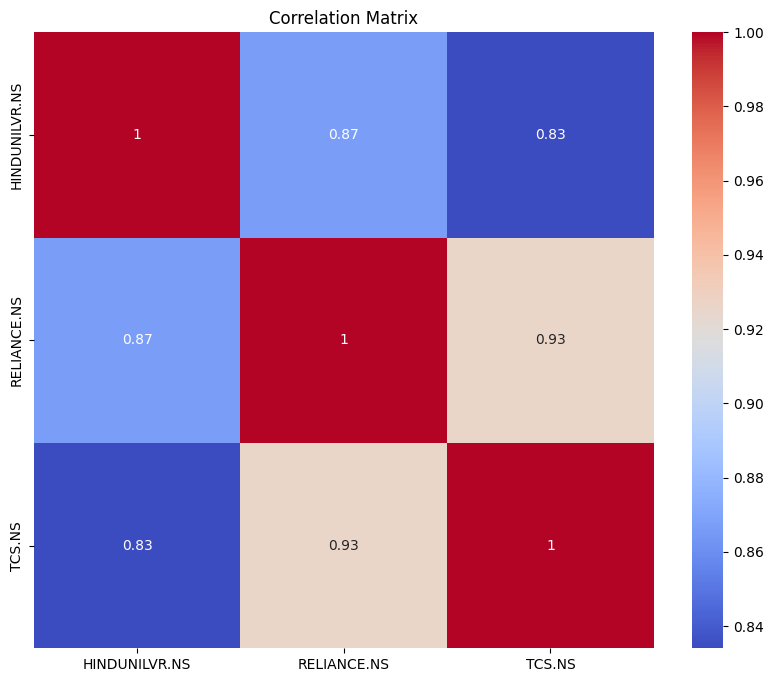

In [47]:
corr_matrix = portfolio_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

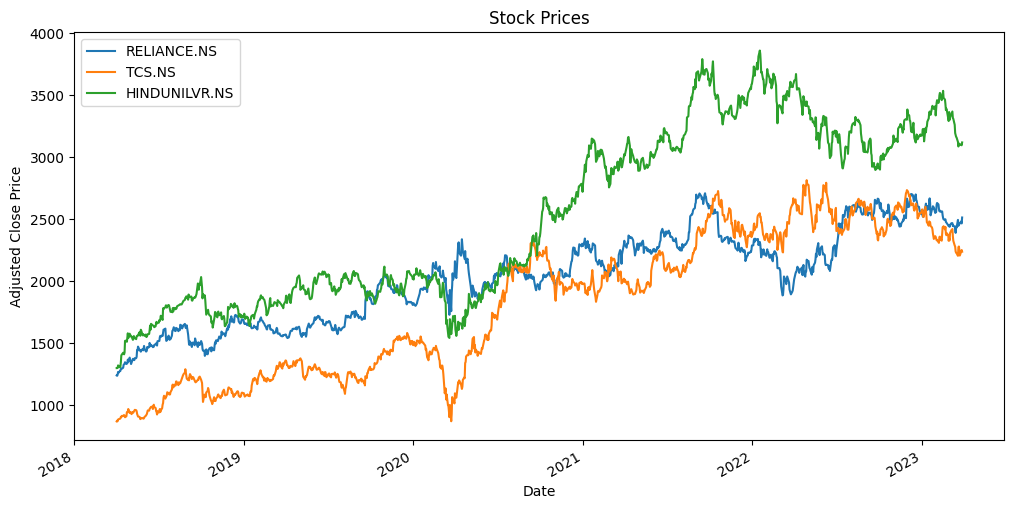

In [48]:
portfolio_df.plot(figsize=(12, 6))

plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(tickers)

plt.show()

In [49]:
portfolio_df.iloc[0]

HINDUNILVR.NS    1236.288940
RELIANCE.NS       865.632202
TCS.NS           1295.890137
Name: 2018-04-02 00:00:00, dtype: float64

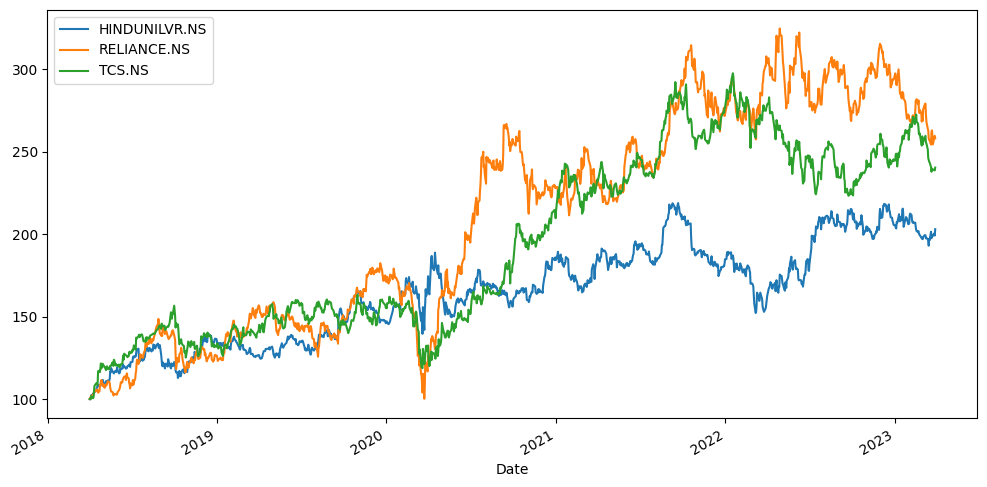

In [50]:
(portfolio_df / portfolio_df.iloc[0] * 100).plot(figsize = (12,6));
plt.show()

In [51]:
d_r_portfolio_df = (portfolio_df / portfolio_df.shift(1)) - 1
d_r_portfolio_df

,HINDUNILVR.NS,RELIANCE.NS,TCS.NS
Date,,,
2018-04-02,NaN,NaN,NaN
2018-04-03,-0.002146,0.007391,0.000550
2018-04-04,0.006712,-0.005169,-0.000120
2018-04-05,0.018233,0.014862,0.016163
2018-04-06,-0.005354,0.003083,-0.002586
...,...,...,...
2023-03-23,0.003533,-0.012650,-0.001964
2023-03-24,-0.001730,-0.019797,-0.001328
2023-03-27,0.007336,0.015545,0.000577


In [52]:
portfolio_weights = np.array([1/3, 1/3, 1/3])  # Equal weightage for the three stocks

portfolio_array = np.dot(d_r_portfolio_df, portfolio_weights)
portfolio_array

array([        nan,  0.00193172,  0.00047407, ...,  0.00781933,
       -0.00128735,  0.00693939])

In [53]:
annual_pf_return = d_r_portfolio_df.mean() * 250
annual_pf_return

HINDUNILVR.NS    0.173137
RELIANCE.NS      0.241346
TCS.NS           0.210322
dtype: float64

# **Evaluation of Portfolio Performance - Sharpe Ratio**

In [54]:
cumulative_returns = (d_r_portfolio_df + 1).cumprod()

# Calculate portfolio return considering equal weightage
portfolio_weights = np.array([1/3, 1/3, 1/3])
portfolio_return = np.dot(cumulative_returns, portfolio_weights)

num_years = len(portfolio_return) / 250

portfolio_cagr = (portfolio_return[-1])**(1 / num_years) - 1

print("Portfolio CAGR: {:.2%}".format(portfolio_cagr))

Portfolio CAGR: 18.73%


In [55]:
portfolio_var = np.dot(portfolio_weights.T, np.dot(d_r_portfolio_df.cov() * 250, portfolio_weights))

print("Portfolio Variance: {:.2%}".format(portfolio_var))

Portfolio Variance: 4.05%


In [56]:
portfolio_std = np.dot(portfolio_weights.T, np.dot(d_r_portfolio_df.cov() * 250, portfolio_weights)) ** 0.5

print("Portfolio Standard Deviation: {:.2%}".format(portfolio_std))

Portfolio Standard Deviation: 20.12%


In [57]:
# Taking Risk Free Return as 7%
risk_free_return = 0.07

portfolio_sr = (portfolio_cagr - risk_free_return) / portfolio_std

print("Portfolio Sharpe Ratio: {:.2}".format(portfolio_sr))

Portfolio Sharpe Ratio: 0.58


The portfolio Sharpe ratio, which is calculated by considering the overall performance and risk of the portfolio, is 0.58. This indicates that the portfolio generated a higher risk-adjusted return compared to the individual stocks. A higher portfolio Sharpe ratio suggests that the combination of assets in the portfolio was able to provide a more favorable risk-return trade-off.

# **Hypothesis Testing - ANOVA**

**Null Hypothesis (Ho)** - The mean Daily Return of Reliance, TCS and HUL doesn't have significant differences

**Alternate Hypothesis (Ha)** - The mean Daily Return of Reliance, TCS and HUL have significant differences

In [58]:
from scipy import stats

d_r_portfolio_df.dropna(inplace=True)

hul_returns = d_r_portfolio_df['HINDUNILVR.NS']
ril_returns = d_r_portfolio_df['RELIANCE.NS']
tcs_returns = d_r_portfolio_df['TCS.NS']

f_statistic, p_value = stats.f_oneway(hul_returns, ril_returns, tcs_returns)

print("F-Statistic:", f_statistic)
print("p-value:", p_value)

F-Statistic: 0.07676274055167007
p-value: 0.9261110286513675


The obtained F-Statistic of 0.0768 and the associated p-value of 0.9261 (p-value > 0.05) suggest that there is no significant difference in the means of the daily returns among the three stocks (HUL, RIL, and TCS). The high p-value indicates that the observed variation in the data is likely due to random chance rather than a true difference in the means. Therefore, we fail to reject the null hypothesis, which assumes no significant differences among the means of the stocks' daily returns.

# **Linear Regression**

In [59]:
reliance_df

,Open,High,Low,Close,Adj Close,Volume,MA50,MA100,MA200,daily_return,Daily_Return
Date,,,,,,,,,,,
2018-04-02,884.614746,892.490112,878.175781,884.565186,865.632202,5766209,NaN,NaN,NaN,NaN,NaN
2018-04-03,882.633545,893.233032,876.937500,891.103210,872.030212,6425059,NaN,NaN,NaN,0.007391,0.007391
2018-04-04,896.204895,903.238220,883.673645,886.496887,867.522461,6560005,NaN,NaN,NaN,-0.005169,-0.005169
2018-04-05,896.601135,901.455078,895.016113,899.671997,880.415649,3935631,NaN,NaN,NaN,0.014862,0.014862
2018-04-06,899.473877,909.875305,896.502075,902.445740,883.130066,4460344,NaN,NaN,NaN,0.003083,0.003083
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,2268.000000,2269.899902,2243.050049,2247.800049,2247.800049,7499082,2363.862002,2480.390508,2495.897185,-0.012650,-0.012650
2023-03-24,2245.250000,2250.000000,2198.000000,2203.300049,2203.300049,5711497,2357.405005,2477.125007,2493.091550,-0.019797,-0.019797
2023-03-27,2217.500000,2254.000000,2200.199951,2237.550049,2237.550049,6486068,2352.724004,2474.044009,2490.699934,0.015545,0.015545


In [60]:
reliance_df2 = reliance_df.drop(['Open', 'High', 'Low', 'Close','Daily_Return'], axis=1)
reliance_df2

,Adj Close,Volume,MA50,MA100,MA200,daily_return
Date,,,,,,
2018-04-02,865.632202,5766209,NaN,NaN,NaN,NaN
2018-04-03,872.030212,6425059,NaN,NaN,NaN,0.007391
2018-04-04,867.522461,6560005,NaN,NaN,NaN,-0.005169
2018-04-05,880.415649,3935631,NaN,NaN,NaN,0.014862
2018-04-06,883.130066,4460344,NaN,NaN,NaN,0.003083
...,...,...,...,...,...,...
2023-03-23,2247.800049,7499082,2363.862002,2480.390508,2495.897185,-0.012650
2023-03-24,2203.300049,5711497,2357.405005,2477.125007,2493.091550,-0.019797
2023-03-27,2237.550049,6486068,2352.724004,2474.044009,2490.699934,0.015545


In [61]:
reliance_df2.isnull().sum()

Adj Close         0
Volume            0
MA50             49
MA100            99
MA200           199
daily_return      1
dtype: int64

In [62]:
reliance_df2['MA50'].fillna(method='bfill', inplace=True)
reliance_df2['MA100'].fillna(method='bfill', inplace=True)
reliance_df2['MA200'].fillna(method='bfill', inplace=True)
reliance_df2['daily_return'].fillna(method='bfill', inplace=True)

In [63]:
reliance_df2

,Adj Close,Volume,MA50,MA100,MA200,daily_return
Date,,,,,,
2018-04-02,865.632202,5766209,915.265812,986.894439,1053.020193,0.007391
2018-04-03,872.030212,6425059,915.265812,986.894439,1053.020193,0.007391
2018-04-04,867.522461,6560005,915.265812,986.894439,1053.020193,-0.005169
2018-04-05,880.415649,3935631,915.265812,986.894439,1053.020193,0.014862
2018-04-06,883.130066,4460344,915.265812,986.894439,1053.020193,0.003083
...,...,...,...,...,...,...
2023-03-23,2247.800049,7499082,2363.862002,2480.390508,2495.897185,-0.012650
2023-03-24,2203.300049,5711497,2357.405005,2477.125007,2493.091550,-0.019797
2023-03-27,2237.550049,6486068,2352.724004,2474.044009,2490.699934,0.015545


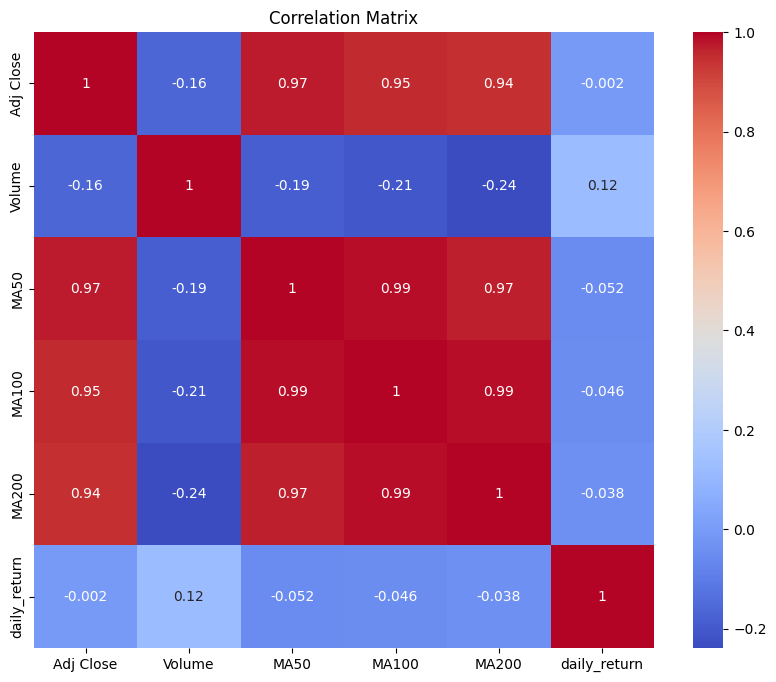

In [64]:
corr_matrix = reliance_df2.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

reliance_df2_scaled = scaler.fit_transform(reliance_df2)

print(reliance_df2_scaled)

[[-1.66009088 -0.56579868 -1.52366797 -1.37545362 -1.20350144  0.32239437]
 [-1.6490153  -0.47662731 -1.52366797 -1.37545362 -1.20350144  0.32239437]
 [-1.65681866 -0.45836318 -1.52366797 -1.37545362 -1.20350144 -0.30829849]
 ...
 [ 0.71483324 -0.46837011  0.96022191  1.23534953  1.41049885  0.73181553]
 [ 0.73292313 -0.56068146  0.95263265  1.22995728  1.40556833  0.18577155]
 [ 0.70989944 -0.17169546  0.94539589  1.22367144  1.40128279 -0.34581403]]


In [66]:
reliance_df2_final = pd.DataFrame(reliance_df2_scaled, columns=reliance_df2.columns)

In [67]:
reliance_df2_final

,Adj Close,Volume,MA50,MA100,MA200,daily_return
0,-1.660091,-0.565799,-1.523668,-1.375454,-1.203501,0.322394
1,-1.649015,-0.476627,-1.523668,-1.375454,-1.203501,0.322394
2,-1.656819,-0.458363,-1.523668,-1.375454,-1.203501,-0.308298
3,-1.634499,-0.813556,-1.523668,-1.375454,-1.203501,0.697531
4,-1.629800,-0.742540,-1.523668,-1.375454,-1.203501,0.106076
...,...,...,...,...,...,...
1232,0.732577,-0.331265,0.979468,1.246491,1.419949,-0.683951
1233,0.655543,-0.573204,0.968311,1.240758,1.414847,-1.042805
1234,0.714833,-0.468370,0.960222,1.235350,1.410499,0.731816
1235,0.732923,-0.560681,0.952633,1.229957,1.405568,0.185772


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = reliance_df2_final.drop('Adj Close', axis=1) # Feature variables
y = reliance_df2_final['Adj Close']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

Coefficients: [ 0.02406655  1.40561838 -0.80850048  0.38115015  0.03534454]
Intercept: -0.00324195286761602
MSE: 0.0378319423121605
RMSE: 0.19450435036821284
MAE: 0.15029099089952921
R-squared: 0.9629951075339602


In [69]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(y, X)

results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     5663.
Date:                Fri, 23 Jun 2023   Prob (F-statistic):               0.00
Time:                        13:33:13   Log-Likelihood:                 210.44
No. Observations:                1237   AIC:                            -408.9
Df Residuals:                    1231   BIC:                            -378.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.781e-17      0.006  -8.22e-15   